In [120]:
#Decision Tree

import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor

#read
data=pd.read_csv("Titanic-Dataset.csv")


In [121]:
#dropping missing values
data=data.dropna()


In [122]:
#data=data.isnull() to check if missing values exist


In [123]:
#selecting features Pclass,Age,Sex,Survived
target= ['Pclass','Age','Sex','Survived']

#splitting the data
features = data[target]
remainder= data.drop(columns=target) 
remainder=remainder.drop(['Name','Ticket','Embarked','Cabin'],axis=1)

In [124]:
features['Sex']=features['Sex'].replace({'female':1,'male':0})


In [125]:
#Replacing categorical values of Sex by Numeric Values
data['Sex']=data['Sex'].replace({'female':1,'male':0})


In [126]:
#to calculate entropy
import numpy as np
def calculate_entropy(y):
    counts= np.bincount(y)
    probabilities=counts/len(y)
    entropy = -np.sum([p*np.log2(p) for p in probabilities if p>0])
    return entropy
    
def calculate_information_gain(X_column, y, threshold):
    """Calculate information gain for a specific feature and threshold."""
    # Split the data into two parts based on the threshold
    left_indices = X_column <= threshold
    right_indices = X_column > threshold
    
    # Calculate entropy before the split
    entropy_before = calculate_entropy(y)
    
    # Calculate entropy after the split
    left_entropy = calculate_entropy(y[left_indices])
    right_entropy = calculate_entropy(y[right_indices])
    n = len(y)
    n_left = len(y[left_indices])
    n_right = len(y[right_indices])
    entropy_after = (n_left / n) * left_entropy + (n_right / n) * right_entropy
    
    # Calculate information gain
    information_gain = entropy_before - entropy_after
    return information_gain




In [127]:
#from target Select Age feature f1
f1=features.drop(['Pclass','Survived'],axis=1)
f1['Sex']=f1['Sex'].replace({'female':1,'male':0})


In [128]:
#splitting into training and test set
x_train, x_test, y_train, y_test = train_test_split(remainder, f1, test_size=0.3, random_state=42)

In [129]:
#building entropy
clf=DecisionTreeRegressor(random_state=42)
clf.fit(x_train,y_train['Age'])#calculating decison tree classifier for Age

DecisionTreeRegressor(random_state=42)

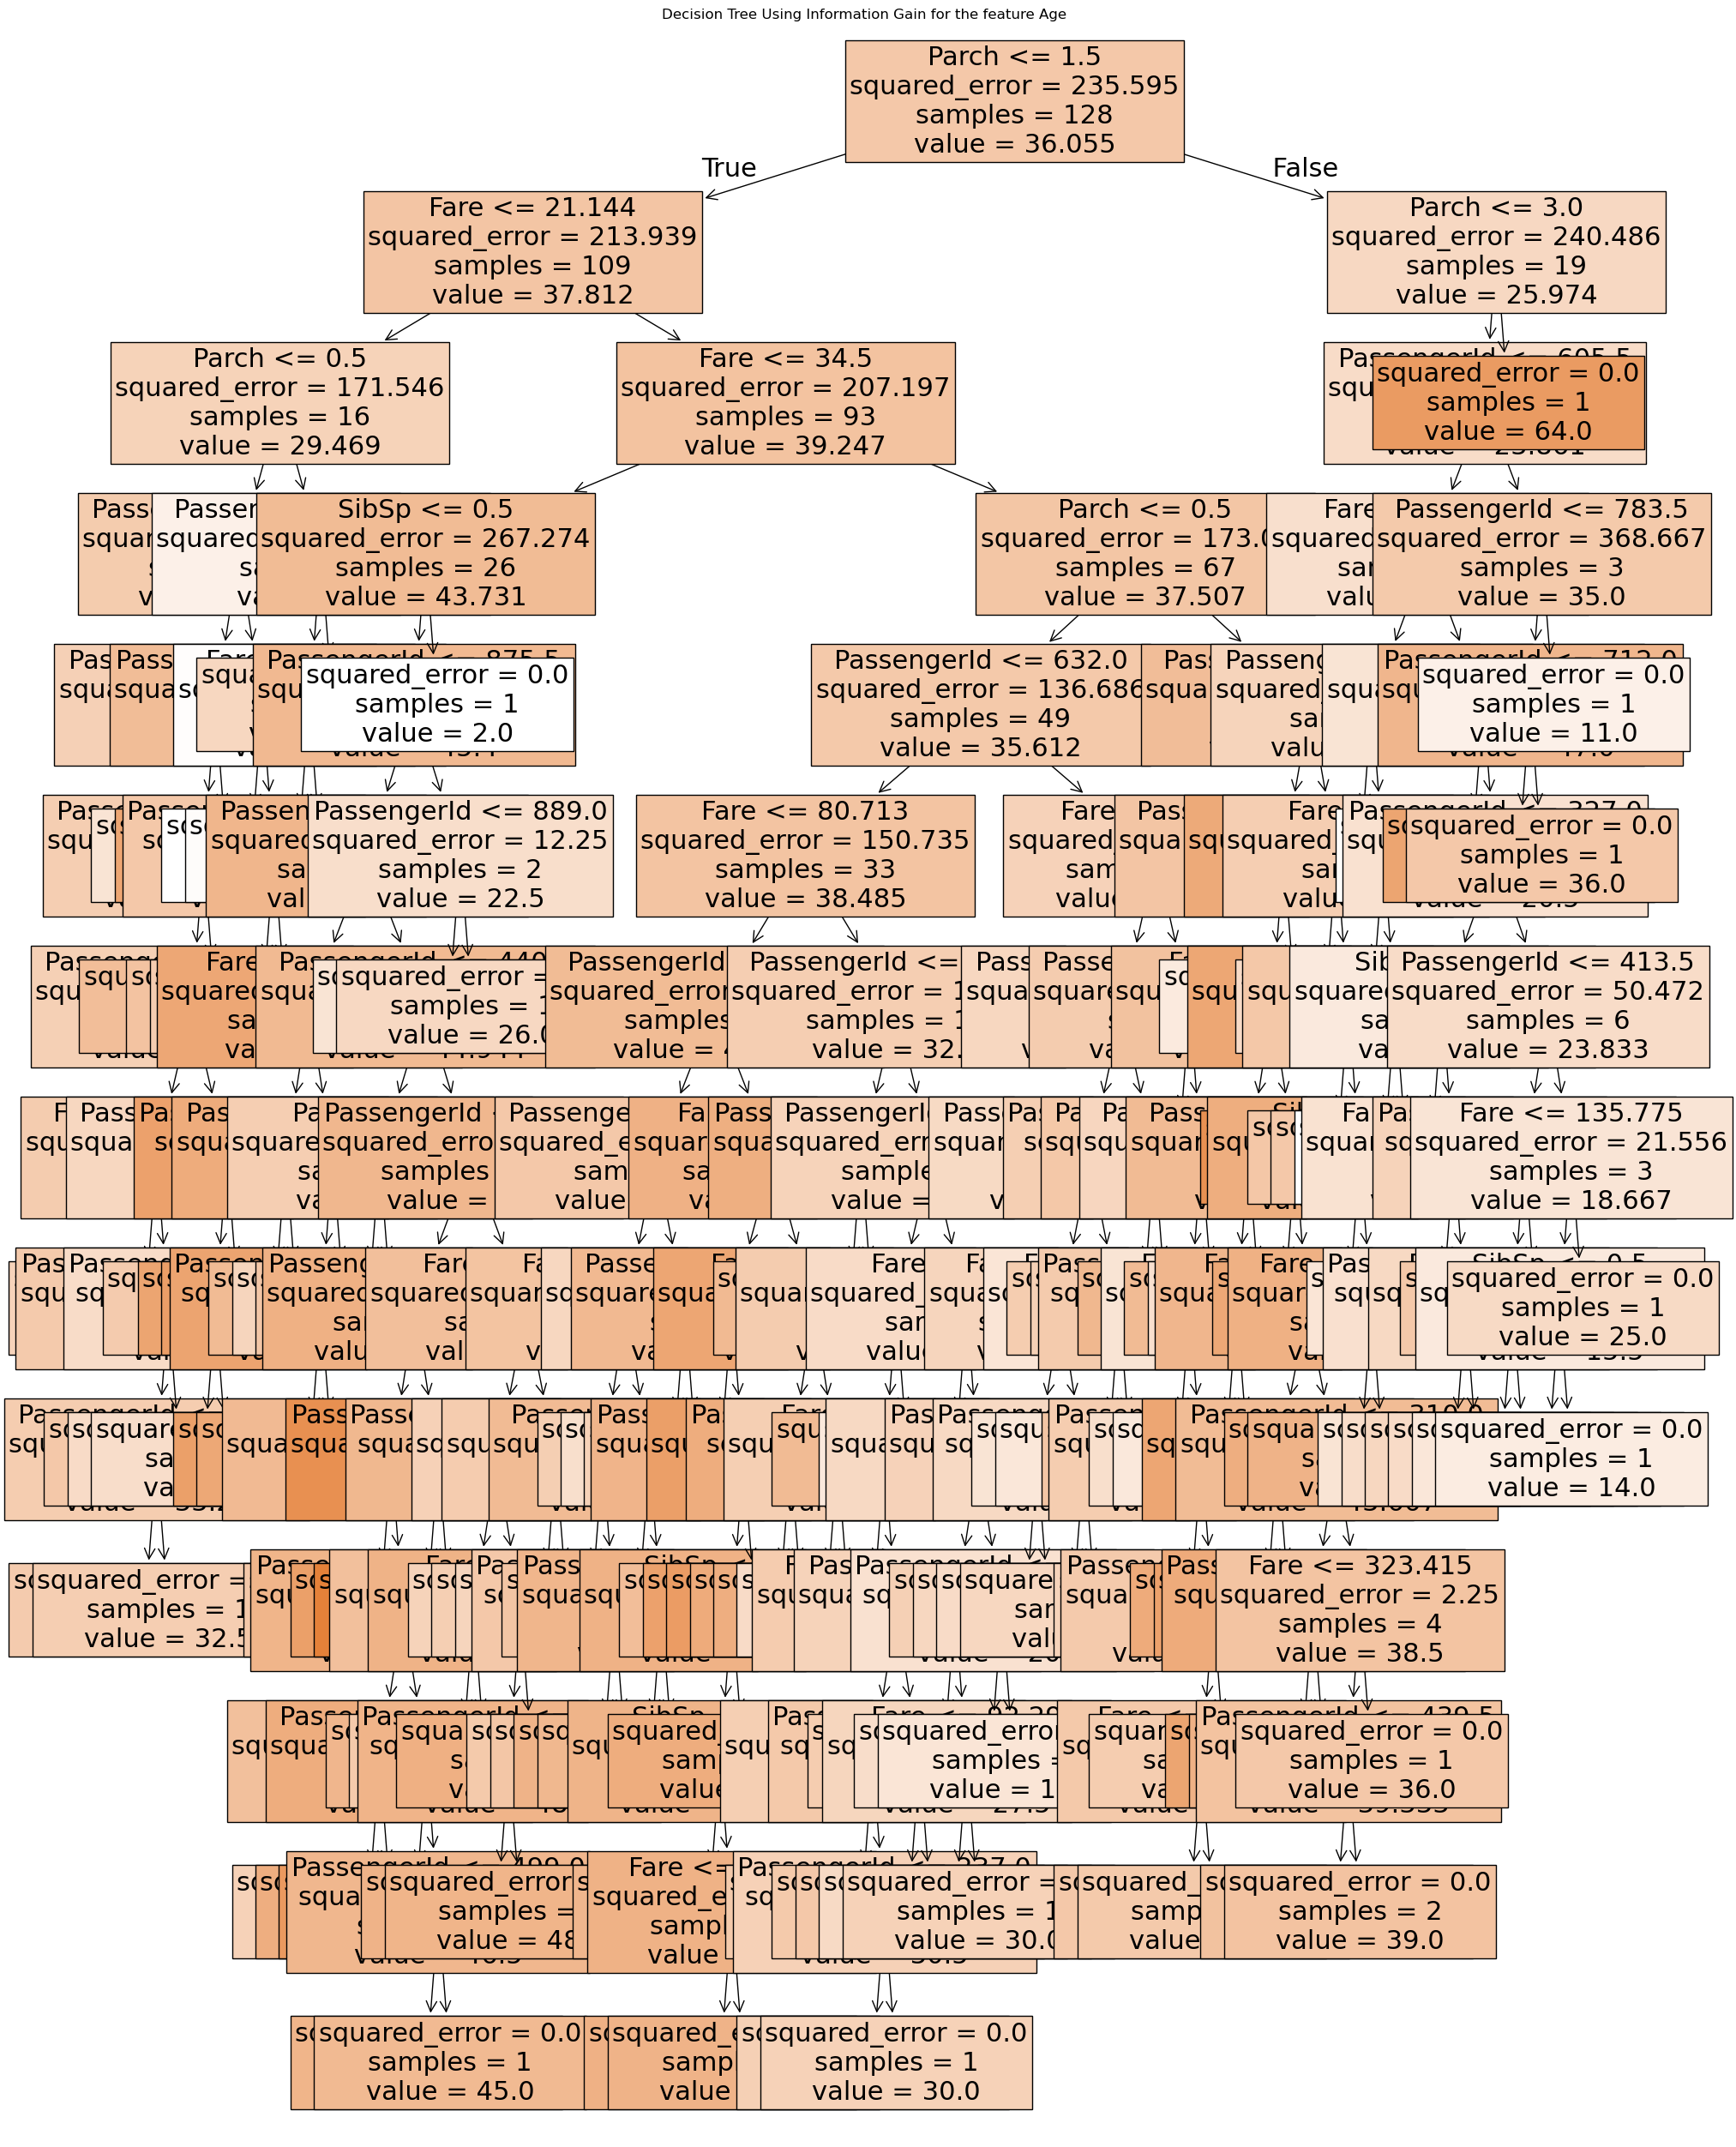

In [130]:
#Plotting the decision tree for Age
plt.figure(figsize=(22,32))  #12,8
plot_tree(clf, feature_names=remainder.columns, class_names=features.columns, fontsize=22, filled=True)
plt.title("Decision Tree Using Information Gain for the feature Age")
plt.show()

In [131]:
#Printing the IG
for feature_idx, feature_name in enumerate(f1.columns):
    thresholds = np.unique(x_train.iloc[:, feature_idx])  # Get unique values of the feature
    print(f"\nFeature: {feature_name}")
    for threshold in thresholds:
        info_gain = calculate_information_gain(x_train.iloc[:, feature_idx], y_train['Age'], threshold)
        print(f"  Threshold: {threshold:.2f}, Information Gain: {info_gain:.4f}")


Feature: Age
  Threshold: 2.00, Information Gain: 0.0503
  Threshold: 4.00, Information Gain: 0.0723
  Threshold: 11.00, Information Gain: 0.1009
  Threshold: 12.00, Information Gain: 0.1158
  Threshold: 22.00, Information Gain: 0.1375
  Threshold: 24.00, Information Gain: 0.1569
  Threshold: 28.00, Information Gain: 0.1617
  Threshold: 53.00, Information Gain: 0.1677
  Threshold: 63.00, Information Gain: 0.1819
  Threshold: 67.00, Information Gain: 0.1888
  Threshold: 89.00, Information Gain: 0.1945
  Threshold: 93.00, Information Gain: 0.2050
  Threshold: 103.00, Information Gain: 0.2300
  Threshold: 124.00, Information Gain: 0.2326
  Threshold: 125.00, Information Gain: 0.2402
  Threshold: 137.00, Information Gain: 0.2528
  Threshold: 138.00, Information Gain: 0.2587
  Threshold: 149.00, Information Gain: 0.2417
  Threshold: 152.00, Information Gain: 0.2461
  Threshold: 171.00, Information Gain: 0.2498
  Threshold: 175.00, Information Gain: 0.2529
  Threshold: 195.00, Information G

In [132]:
#from target select feature 2 Pclass
f2=features.drop(['Age','Survived'],axis=1)
f2['Sex']=f2['Sex'].replace({'female':1,'male':0})
print (f2)

#splitting into training and test set
x_train, x_test, y_train, y_test = train_test_split(remainder, f2, test_size=0.3, random_state=42)

#building entropy
clf=DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(x_train,y_train['Pclass'])#calculating decison tree classifier for Pclass

     Pclass  Sex
1         1    1
3         1    1
6         1    0
10        3    1
11        1    1
..      ...  ...
871       1    1
872       1    0
879       1    1
887       1    1
889       1    0

[183 rows x 2 columns]


DecisionTreeClassifier(criterion='entropy', random_state=42)

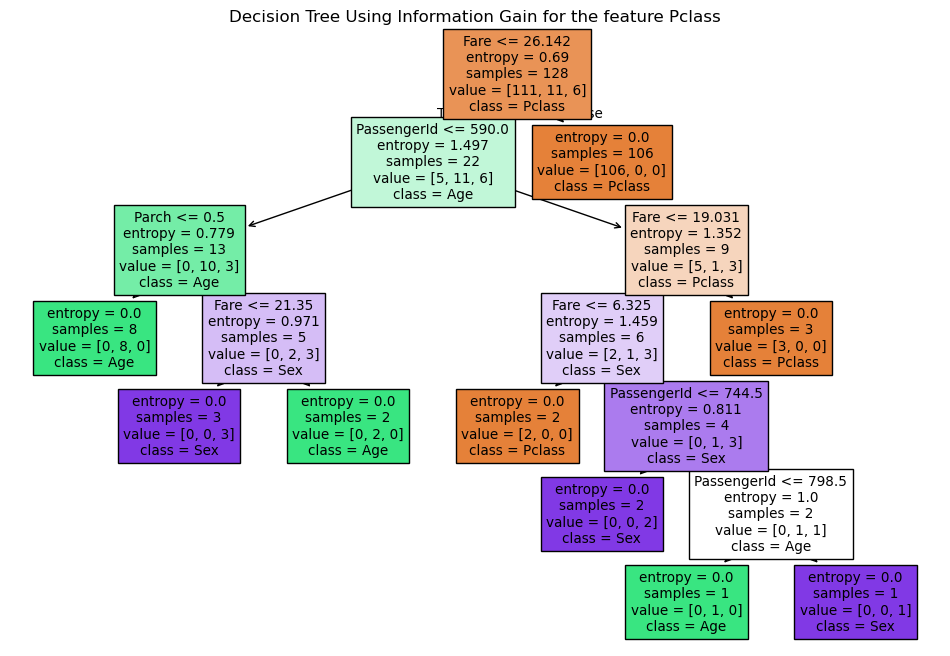

In [133]:
#Plotting the decision tree for Pclass
plt.figure(figsize=(12,8))  #12,8
plot_tree(clf, feature_names=remainder.columns, class_names=features.columns,filled=True)
plt.title("Decision Tree Using Information Gain for the feature Pclass")
plt.show()

In [134]:
#Printing the IG
for feature_idx, feature_name in enumerate(f2.columns):
    thresholds = np.unique(x_train.iloc[:, feature_idx])  # Get unique values of the feature
    print(f"\nFeature: {feature_name}")
    for threshold in thresholds:
        info_gain = calculate_information_gain(x_train.iloc[:, feature_idx], y_train['Pclass'], threshold)
        print(f"  Threshold: {threshold:.2f}, Information Gain: {info_gain:.4f}")


Feature: Pclass
  Threshold: 2.00, Information Gain: 0.0016
  Threshold: 4.00, Information Gain: 0.0032
  Threshold: 11.00, Information Gain: 0.0170
  Threshold: 12.00, Information Gain: 0.0147
  Threshold: 22.00, Information Gain: 0.0143
  Threshold: 24.00, Information Gain: 0.0106
  Threshold: 28.00, Information Gain: 0.0080
  Threshold: 53.00, Information Gain: 0.0060
  Threshold: 63.00, Information Gain: 0.0045
  Threshold: 67.00, Information Gain: 0.0119
  Threshold: 89.00, Information Gain: 0.0095
  Threshold: 93.00, Information Gain: 0.0076
  Threshold: 103.00, Information Gain: 0.0059
  Threshold: 124.00, Information Gain: 0.0161
  Threshold: 125.00, Information Gain: 0.0139
  Threshold: 137.00, Information Gain: 0.0119
  Threshold: 138.00, Information Gain: 0.0102
  Threshold: 149.00, Information Gain: 0.0223
  Threshold: 152.00, Information Gain: 0.0201
  Threshold: 171.00, Information Gain: 0.0181
  Threshold: 175.00, Information Gain: 0.0162
  Threshold: 195.00, Informatio

In [135]:
#from target select feature 3 Survived
f3=features.drop(['Pclass','Age'],axis=1)
f3['Sex']=f3['Sex'].replace({'female':1,'male':0})
print (f3)

#splitting into training and test set
x_train, x_test, y_train, y_test = train_test_split(remainder, f3, test_size=0.3, random_state=42)

#building entropy
clf=DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(x_train,y_train['Survived'])#calculating decison tree classifier for Pclass

     Sex  Survived
1      1         1
3      1         1
6      0         0
10     1         1
11     1         1
..   ...       ...
871    1         1
872    0         0
879    1         1
887    1         1
889    0         1

[183 rows x 2 columns]


DecisionTreeClassifier(criterion='entropy', random_state=42)